In [14]:
!pip3 install pandas matplotlib seaborn

     -------------------------------------- 294.6/294.6 KB 9.2 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd  # For Data Manipulation
import numpy as np  # For Array Manipulation

#import calendar  # For Month Manipulation

import matplotlib.pyplot as plt  # For Data Visualization
#import seaborn as sb  # For Data Visualization

In [6]:
music = pd.read_csv(r"mxmh_survey_results.csv", encoding= "Latin-1")

In [7]:
music.sample(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
662,9/14/2022 0:58:57,32.0,Spotify,1.0,Yes,No,No,Metal,Yes,Yes,...,Rarely,Sometimes,Very frequently,Rarely,6.0,8.0,7.0,0.0,Improve,I understand.
234,8/28/2022 22:39:24,30.0,Spotify,6.0,Yes,No,No,Folk,Yes,Yes,...,Never,Never,Very frequently,Never,9.0,0.0,5.0,0.0,No effect,I understand.
427,8/30/2022 17:33:13,31.0,I do not use a streaming service.,4.0,Yes,Yes,No,Classical,Yes,Yes,...,Never,Never,Sometimes,Sometimes,8.0,8.0,9.0,3.0,Improve,I understand.
513,9/2/2022 5:21:18,63.0,YouTube Music,8.0,Yes,No,No,Rock,Yes,No,...,Rarely,Never,Sometimes,Never,2.0,1.0,2.0,2.0,Improve,I understand.
263,8/29/2022 0:39:19,20.0,Spotify,3.0,No,No,No,Country,Yes,Yes,...,Very frequently,Rarely,Sometimes,Never,8.0,4.0,3.0,4.0,Improve,I understand.


In [ ]:
music.info()

In [ ]:
music = music.dropna(axis= 0)
music['Mental Health'] = music['Anxiety'] + music['Depression'] + music['Insomnia'] + music['OCD']
music.head()

In [ ]:
cols = list(music.columns.values)
cols

In [ ]:
music['Fav genre'].unique()

In [ ]:
fav_genre = music.groupby('Fav genre')

video_game = fav_genre.get_group('Video game music')
jazz = fav_genre.get_group('Jazz')
rnb = fav_genre.get_group('R&B')
k_pop = fav_genre.get_group('K pop')
rock = fav_genre.get_group('Rock')
edm = fav_genre.get_group('EDM')
country = fav_genre.get_group('Country')
hip_hop = fav_genre.get_group('Hip hop')
rap = fav_genre.get_group('Rap')
pop = fav_genre.get_group('Pop')
classical = fav_genre.get_group('Classical')
metal = fav_genre.get_group('Metal')
folk = fav_genre.get_group('Folk')
lofi = fav_genre.get_group('Lofi')
gospel = fav_genre.get_group('Gospel')
latin = fav_genre.get_group('Latin')

video_game.describe()

In [ ]:
video_game_stat = video_game.describe().transpose()
jazz_stat = jazz.describe().transpose()
rnb_stat = rnb.describe().transpose()
k_pop_stat = k_pop.describe().transpose()
rock_stat = rock.describe().transpose()
edm_stat = edm.describe().transpose()
country_stat = country.describe().transpose()
hip_hop_stat = hip_hop.describe().transpose()
rap_stat = rap.describe().transpose()
pop_stat = pop.describe().transpose()
classical_stat = classical.describe().transpose()
metal_stat = metal.describe().transpose()
folk_stat = folk.describe().transpose()
lofi_stat = lofi.describe().transpose()
gospel_stat = gospel.describe().transpose()
latin_stat = latin.describe().transpose()
latin_stat

In [ ]:
x = pop['Hours per day']
y = pop['Mental Health']
plt.scatter(x, y)
plt.xlabel("Hours Listened per Day")
plt.ylabel("Depression")
plt.title("Hours Listened vs Depression (Classical)")
plt.show()

In [ ]:

#Based on the frequency of classical (all genres) 

#of music shows improvement (no improvement) with anxiety, aggression, insomnia and or OCD?

#If listening to (given genre) several hours per day this will improve or not improve the mental outcome

#How likely is someone going to listen to a specific genre of music?

#If a higher or lower age group listens (name of genre) this will have a negative or positive impact on mental functioning.

#BPM (beats per minute) over 100 to reflect anxiety, aggression, insomnia and or OCD?

#Data profiling to clean any missing data -- like on a given day where data is missing 

#How can this influence the data and results of music impacting mental functioning 


In [8]:
#Popular genre across age group
def age_group(age):
    if age <= 18:
        return "0-18"
    elif age > 18 and age <=35:
        return "18-35"
    elif age > 35 and age <=100:
        return "35-100"
    else:
        return "error"

In [17]:
music['age_grp'] = music['Age'].apply(age_group)
music = music[music['age_grp'] != 'error']

In [12]:
print(music['age_grp'].head(5))

0      0-18
1    35-100
2      0-18
3    35-100
4      0-18
Name: age_grp, dtype: object


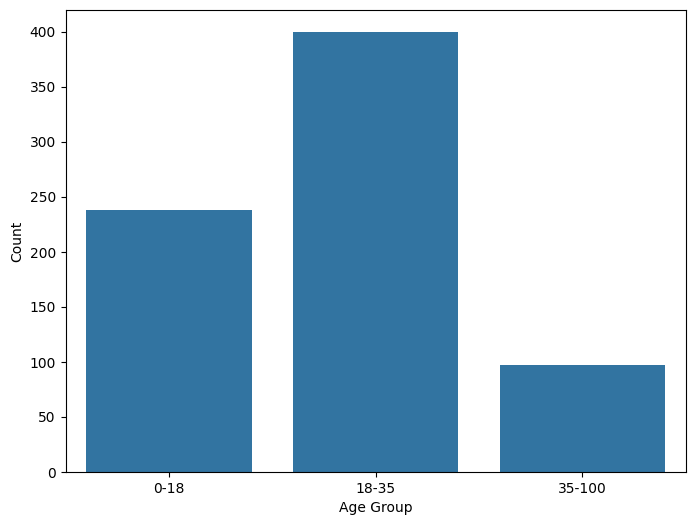

In [18]:
age_grp_counts = music['age_grp'].value_counts().sort_index()

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,6))
sns.barplot(x=age_grp_counts.index, y=age_grp_counts.values)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [19]:
music.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions', 'age_grp'],
      dtype='object')